In [18]:
import numpy as np
%matplotlib inline

# Introduction

In this notebook we'll run the same quantum circuit $H |0>$ using 5 different quantum programming packages:

- [Project Q](#Project-Q)
- [Qiskit](#Qiskit)
- [Quil](#Quil)
- [Cirq](#Cirq)
- [Q#](#Q$\#$)

## What are we running?

In [20]:
from qutip import snot  # Hadamard gate

In [27]:
snot()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

In [23]:
snot() * basis(2, 0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

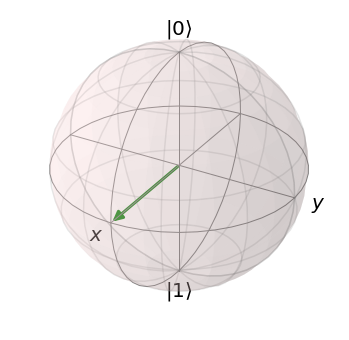

In [24]:
from qutip import Bloch, basis
import pylab as pl
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

fig = pl.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

b = Bloch(fig=fig, axes=ax)
state = snot() * basis(2, 0)
b.add_states(state)
b.render(fig=fig, axes=ax)

# Project Q

In [2]:
from projectq import MainEngine
from projectq.ops import H, Measure

eng = MainEngine()
qubit = eng.allocate_qubit()

H | qubit
Measure | qubit

eng.flush()
print("Measured {}".format(int(qubit)))

Measured 0


# Qiskit

In [3]:
from qiskit import BasicAer
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute

In [4]:
# set up Quantum Register and Classical Register for 1 qubit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)

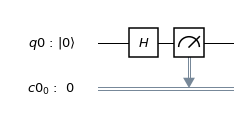

In [17]:
qc.draw(output='mpl')

In [6]:
job = execute(qc, backend=BasicAer.get_backend('qasm_simulator'), shots=1000)
result = job.result()
result

Result(backend_name='qasm_simulator', backend_version='2.0.0', header=Obj(backend_name='qasm_simulator'), job_id='ad864e07-26f7-462f-9044-7e469a508990', qobj_id='22af2df5-9794-48de-9da4-6f89a1b6d90f', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=502, 0x1=498)), header=Obj(clbit_labels=[['c0', 0]], compiled_circuit_qasm='OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q0[1];\ncreg c0[1];\nu2(0,pi) q0[0];\nmeasure q0[0] -> c0[0];\n', creg_sizes=[['c0', 1]], memory_slots=1, n_qubits=1, name='circuit0', qreg_sizes=[['q0', 1]], qubit_labels=[['q0', 0]]), name='circuit0', seed=845958303, shots=1000, status='DONE', success=True, time_taken=0.005814790725708008)], status='COMPLETED', success=True, time_taken=0.0060269832611083984)

In [7]:
result.get_counts(qc)

{'1': 498, '0': 502}

Get quantum wavefunction

In [14]:
job = execute(qc, backend=BasicAer.get_backend('statevector_simulator'))
result = job.result()
state = result.get_statevector()
state

array([0.70710678+0.j, 0.70710678+0.j])

# Quil

In [15]:
from pyquil.api import QVMConnection
from pyquil.quil import Program, Declare
from pyquil.gates import X, MEASURE, RX, H
import subprocess

# Start the Lisp server in a subprocess
qvm_server = subprocess.Popen(["/src/qvm/qvm", "-S"])
# Connect to the QVM
qvm = QVMConnection()

In [16]:
program = Program()
ro = program.declare('ro', 'BIT')
program += H(0)

In [17]:
result = qvm.run(program + MEASURE(0, ro[0]), trials=1000)
result

[[0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0]

In [18]:
np.array(result).T[0].sum()

479

In [19]:
wf = qvm.wavefunction(program)
wf.amplitudes

array([0.70710678+0.j, 0.70710678+0.j])

Stop the Lisp server

In [20]:
qvm_server.terminate()

# Cirq

In [21]:
import cirq
simulator = cirq.Simulator()

qubit = cirq.GridQubit(0, 0)
circuit = cirq.Circuit.from_ops(
    cirq.H(qubit),
    cirq.measure(qubit, key='m')
)

In [22]:
print(circuit)

(0, 0): ───H───M('m')───


In [23]:
result = simulator.run(circuit, repetitions=1000)

In [24]:
result

m=01111111011010001011001111100010000111111011100010010111010100000111110110001001111001110010000001010111000011011111111010110010101100110100010111001001011011011001100011010100000010100111111011000001000001000100110011110110010101101101011110111100010001110011001010001110100110111010001011001100011100111001100111111100101010100101001100110111100011101101110111101110101001101010110011010000010000111001101110101011001011111111011001000110110011011011100111101100101111101000100100010011100110000011001110011100001011111011110001001101000001110000101111000010001010101111101011110100110100100010101100110001010011011000101010100000001010110111000100100011011001111010101110001010010001011010100010101010001010111110100011100011111110010100010011111101000111101100001100010111111111001100010110000001000100001111110100010111101001010010001111100001111001111101001100100011011011010111011001001110111111110110100111100001001001111001000011110011010101111011101001010011101110010011010010011111001001

In [25]:
result.measurements["m"]

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [16]:
result.get_statevector()

array([0.70710678+0.j, 0.70710678+0.j])

In [26]:
np.array(result.measurements["m"]).T.sum()

526

# Q$\#$

Make sure to change the kernel to Q# before running this part.

In [1]:
open Microsoft.Quantum.Extensions.Diagnostics; // import the DumpMachine function

operation Hadamard(count: Int) : ( Result[], Int )
    {
        mutable r = Zero;
        mutable numOnes = 0;
        mutable results = new Result[0];

        using (qubits = Qubit[1]) {
            for (test in 1..count)
            {
                H(qubits[0]);

                if (test == 1)
                {
                    DumpMachine(); // Show the current waveform
                }

                set r = M (qubits[0]);

                // Add to the results
                set results = results + [r];

                // Count the number of ones we saw:
                if (r == One)
                {
                    set numOnes = numOnes + 1;
                }

                ResetAll(qubits);
            }
        }

        return (results, numOnes);
    }

Hadamard

In [2]:
operation HadamardRuns() : ( Result[], Int ) {
    let count = 10;
    return Hadamard(count);
}

HadamardRuns

In [9]:
%simulate HadamardRuns

# wave function for qubits with ids (least to most significant): 0
0:	0.707106781186548	0
1:	0.707106781186548	0


([Zero;Zero;One;One;Zero;Zero;Zero;One;Zero;One], 4)